### HOMEWork 2- CLuster Algorithm 

 #### Importing Essential Libraries

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
%matplotlib inline 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn .model_selection import train_test_split 

In [33]:
df = pd.read_csv('Employee_Expenditure.csv')
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100)
0,1,Craig,Male,19,15,39
1,2,Lisa,Male,21,15,81
2,3,Abram,Female,20,16,6
3,4,Alberson,Female,23,16,77
4,5,"Adams,",Female,31,17,40


In [34]:
df.columns 

Index(['Employee ID', 'first_name', 'Sex', 'Age', 'AnlSalaryInK',
       'Spending_ Score (1-100)'],
      dtype='object')

In [35]:
df.shape

(300, 6)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
Employee ID                300 non-null int64
first_name                 300 non-null object
Sex                        300 non-null object
Age                        300 non-null int64
AnlSalaryInK               300 non-null int64
Spending_ Score (1-100)    300 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.1+ KB


#### conversion of  'sex' catergorical values to numerics

In [37]:
def tra_sex(x):
     if x=='Male':
        return 1
     if x=='Female':
        return 2

In [38]:
df['tra_sex']=df['Sex'].apply(tra_sex)
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
0,1,Craig,Male,19,15,39,1
1,2,Lisa,Male,21,15,81,1
2,3,Abram,Female,20,16,6,2
3,4,Alberson,Female,23,16,77,2
4,5,"Adams,",Female,31,17,40,2


In [39]:
df.describe()

,Employee ID,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
count,300.000000,300.000000,300.000000,300.000000,300.00000
mean,150.500000,38.856667,63.963333,49.930000,1.54000
std,86.746758,13.808150,22.736722,25.771022,0.49923
min,1.000000,18.000000,15.000000,1.000000,1.00000
25%,75.750000,28.750000,54.000000,35.000000,1.00000
50%,150.500000,36.000000,65.000000,49.500000,2.00000
75%,225.250000,49.000000,78.000000,72.250000,2.00000
max,300.000000,70.000000,137.000000,99.000000,2.00000


In [40]:
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
0,1,Craig,Male,19,15,39,1
1,2,Lisa,Male,21,15,81,1
2,3,Abram,Female,20,16,6,2
3,4,Alberson,Female,23,16,77,2
4,5,"Adams,",Female,31,17,40,2


Data  Explore 

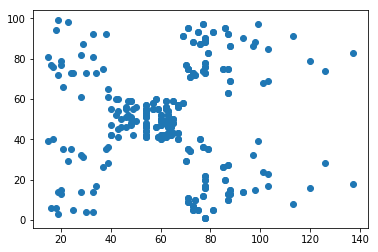

In [41]:
plt.scatter(df['AnlSalaryInK'],df['Spending_ Score (1-100)'] )

In [42]:
# As can be seen on the scatter plot, The large dataset concentration make it  difficult to determin the size of 'k'
# since it is manadatory to determin the size of 'k', 

In [43]:
# Create a K means objects

km = KMeans (n_clusters = 5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
# To fit K measn  object to dataset and predict only AnlSalaryInK','Spending_ Score (1-100) from the dataframe 
y_predicted=km.fit_predict(df[['AnlSalaryInK','Spending_ Score (1-100)']])
y_predicted    

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [45]:
# And it has computed the given K to create  five clusters as shown above

In [46]:
df['cluster']=y_predicted
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex,cluster
0,1,Craig,Male,19,15,39,1,4
1,2,Lisa,Male,21,15,81,1,0
2,3,Abram,Female,20,16,6,2,4
3,4,Alberson,Female,23,16,77,2,0
4,5,"Adams,",Female,31,17,40,2,4


In [47]:
# Visualizing to see  what kind of clusters it produced

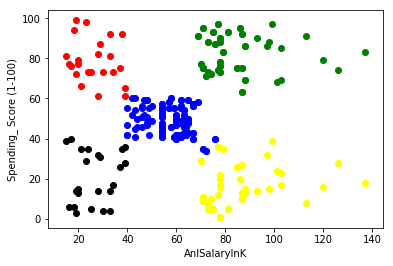

In [48]:
# Separting the five clusters in five dataframes: 

df1= df[df.cluster==0]     # It returns all the rows from df where cluster is zero
df2= df[df.cluster==1]     # It returns all the rows from df where cluster is one
df3= df[df.cluster==2]     # It returns all the rows from df where cluster is two
df4= df[df.cluster==3]     # It returns all the rows from df where cluster is three 
df5= df[df.cluster==4]     # It returns all the rows from df where cluster is four

plt.scatter(df1.AnlSalaryInK,df1['Spending_ Score (1-100)'],color='red') 
plt.scatter(df2.AnlSalaryInK,df2['Spending_ Score (1-100)'],color='green')
plt.scatter(df3.AnlSalaryInK,df3['Spending_ Score (1-100)'],color='yellow')
plt.scatter(df4.AnlSalaryInK,df4['Spending_ Score (1-100)'],color='blue')
plt.scatter(df5.AnlSalaryInK,df5['Spending_ Score (1-100)'],color='black')

plt.xlabel('AnlSalaryInK')
plt.ylabel('Spending_ Score (1-100)')
plt.show()

In [49]:
# due to small scaling , the datapoin and legend keys seem to conjested .
# It requires rescaling to have a better view by uisng Minmax Scaler.

In [50]:
km.cluster_centers_

array([[26.30434783, 78.56521739],
       [82.98507463, 82.02985075],
       [84.61666667, 16.3       ],
       [57.81102362, 48.95275591],
       [26.30434783, 20.91304348]])

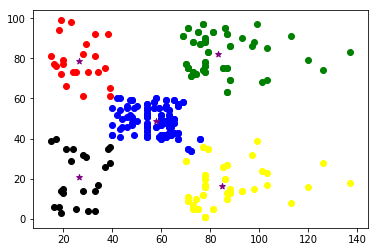

In [51]:
plt.scatter(df1.AnlSalaryInK,df1['Spending_ Score (1-100)'],color='red') 
plt.scatter(df2.AnlSalaryInK,df2['Spending_ Score (1-100)'],color='green')
plt.scatter(df3.AnlSalaryInK,df3['Spending_ Score (1-100)'],color='yellow')
plt.scatter(df4.AnlSalaryInK,df4['Spending_ Score (1-100)'],color='blue')
plt.scatter(df5.AnlSalaryInK,df5['Spending_ Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

In [52]:
# where the pruple star (*) is centroid 

### Elbow Plot Method  
##### We can use the elbow method to find the size of "k"  We try to calculate the SSE by providieng random numbers 1-10  in place of K and plt to find the elbow  to enable us find  the right 'k" size. 

In [53]:
# Lets's define  my K-Range by provideing 1 to 10 
 # so that each iteration creates cluster 
# let's create an arry with the sum of square and store here.

k_range =range(1,10)
sse = []   
for k in k_range:    
    km= KMeans (n_clusters = k)
    km.fit(df[['AnlSalaryInK', 'Spending_ Score (1-100)']])
    sse.append(km.inertia_)    

In [54]:
sse 

[353150.1266666667,
 224588.06767039016,
 128243.93780282042,
 92577.00440440832,
 58028.10720013421,
 50008.26653535375,
 41629.42165581177,
 35165.13308498186,
 30427.74073150201]

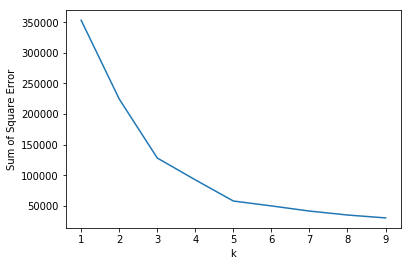

In [55]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range,sse)

In [56]:
# from the plot we can see that K= 5. 

#### K nearess Neighbour (K-NN) Method

In [57]:
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex,cluster
0,1,Craig,Male,19,15,39,1,4
1,2,Lisa,Male,21,15,81,1,0
2,3,Abram,Female,20,16,6,2,4
3,4,Alberson,Female,23,16,77,2,0
4,5,"Adams,",Female,31,17,40,2,4


In [58]:
X= df[['tra_sex']]
y= df['Spending_ Score (1-100)']

In [68]:
Xtrain, Xtest , ytrain ,ytest = train_test_split(X,y,test_size=0.30)

In [69]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_ Score (1-100), dtype: int64

In [70]:
X.head()

,tra_sex
0,1
1,1
2,2
3,2
4,2


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors= 5)
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
y_pred=classifier.predict(Xtest)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00    

C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


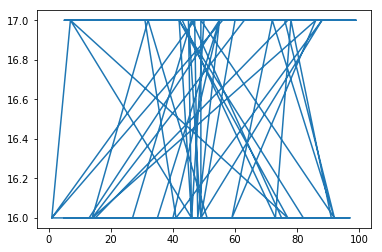

In [84]:
plt.plot(ytest,y_pred)   # the plot shows lot of noise and complicated to explain. 